In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housesalesprediction/kc_house_data.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("Reds_r")

# FIRST KAGGLE NOTEBOOK : MULTIPLE LINEAR REGRESSON MODEL

Linear regression basically is a study of relationship between variables and to estimate or predict the dependent variable. 

The simple equation of linear regression is:
                                            Y = MX + B


While Y is the dependent variables that the value we're going to predict, X is the variable that affect the Y or usually called independent variable. In this equation, M is the slope and tells us how much Y is going to change as the X is changing.

For example, if we're going to predict the salary based on how much experience year that people have, the example of regression equation is going to look like this:
                                            SALARY = 3X + 100.
 
We can see that as that as the job experience that the people have is higher, the salary that they get is 3 times higher. 

Furthermore, in this dataset, we're going to predict the price of houses based on some features related to them. Let's start from understanding the dataset.
# **🟥 DATA PREPARATION 🟥**

In [3]:
data = pd.read_csv('/kaggle/input/housesalesprediction/kc_house_data.csv') #importing data
print('Top five of dataset:')
data.head()

Top five of dataset:


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
print('Data information:')
data.info() 

Data information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  f

From the information above, now we know that the features of dataset consists of :
1. ID : unique id
2. date : date when the house were sold
3. price : the price of the house
4. bedrooms : number of bedrooms
5. bathrooms : number of bathrooms
6. sqft_living : square footage of living area
7. sqft_lot : square footage of total land space
8. floors : numbers of floors
9. waterfront : explain whether the house faces the waterfront or not
10. view : levels of view the house has in 0 - 4
11. condition : the condition of the house
12. grade 
13. sqft_above : square footage of a house that is above the ground (main floor + upper)
14. sqft_basement : square footage of a house below the ground
15. yr_built : the year when the house were built
16. yr_renovated : the year when the house were renovated
17. zipcode : zipcode area of the house
18. lat : latitude
19. long : longitude
20. sqft_living15
21. sqft_lot15

And there are 21613 entries or row

There are many types of value in statistic and to understand what kind of value that the dataset has is useful to do more analysis and decide what kind of visualization to use.





The first type of value is **Categorical**. Categorical value itself is consists of nominal scale and ordinal scale.


* **Nominal scale:** categorize object from the other objects and do not have value that is higher or lower. Ex: Unique ID, Zipcode, yr
* **Ordinal Scale :** categorize object based on numerical value, wether it's higher or lower than others. Ex: bedrooms, bathrooms, floors, Waterfront, view, condition, grade.

The second type is numerical value that consist of interval scale and ratio scale.
* **Interval** : scale used to provide levels at a point of observation, and to measure how much value is between an observation point and another. Ex: sqft_living, sqft_lot, etc
* **Ratio** : almost the same as interval, but ration values will never fall below zero while interval can have some values below zero such as -10, -11, etc.

Before doing data exploratory, we might want to see if there's some nan values.
# **🟥 DATA CLEANSING 🟥**

In [5]:
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

From the information above, we see that the dataset is free from missing value.

* # **New Feature**

In the dataset, there is a column that tells when the house were built. We can generate new features of "Age" that may be useful to use in the model.

In [6]:
data['yr_built']

0        1955
1        1951
2        1933
3        1965
4        1987
         ... 
21608    2009
21609    2014
21610    2009
21611    2004
21612    2008
Name: yr_built, Length: 21613, dtype: int64

In [7]:
data['Age'] = data['yr_built'].max() - data['yr_built']
data['Age'].head()

0    60
1    64
2    82
3    50
4    28
Name: Age, dtype: int64

# **🟥 DATA EXPLORATION 🟥**

In data exploration, we describe dataset characterization to understand the dataset more using data visuzlization or statistical method. The basic exploration that we can do is using .describe() to see the descriptive statistic for each feature.

In [8]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Age
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,...,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,43.994864
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,...,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,29.373411
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,18.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,40.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,...,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,64.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,115.000000


* # **Visualization for categorical data**

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  anchor: 2-tuple of floats or {'C', 'SW', 'S', 'SE', ...}
  animated: bool
  aspect: {'auto'} or num
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  box_aspect: None, or a number
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  contains: unknown
  facecolor or fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool or None
  sketch_params: (scale: float, length: float, randomness: float

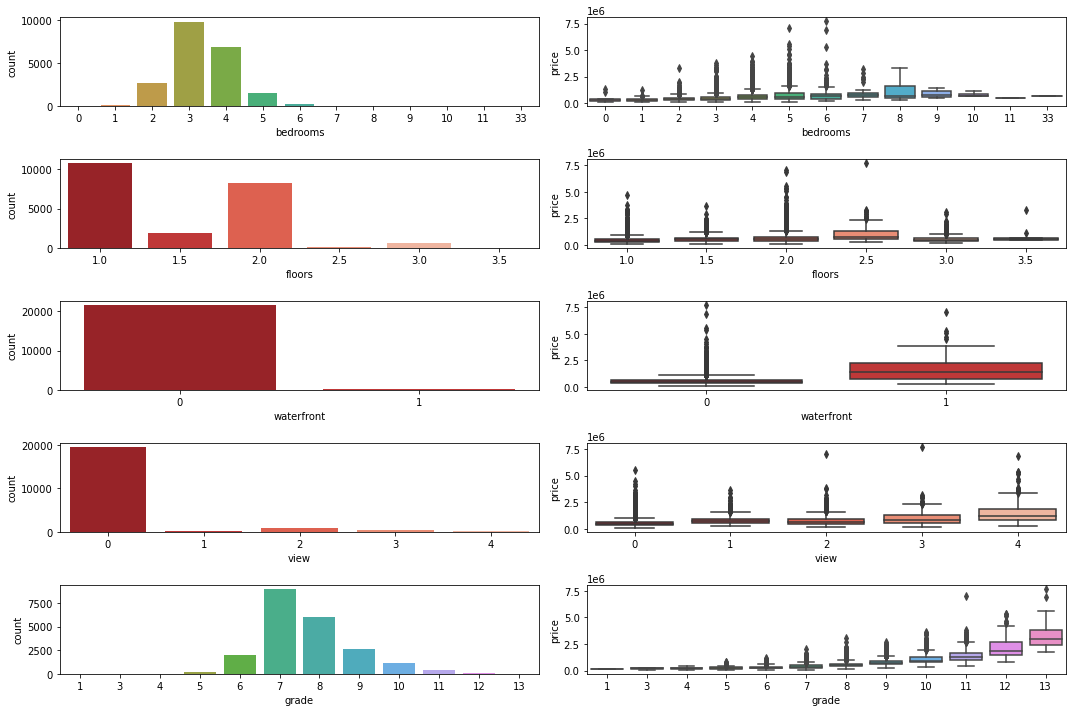

In [9]:

def ob_numplot(column):
    fig, axs = plt.subplots(5,2, figsize=(15, 10))
    for i, clm in enumerate(column):
        sns.countplot(x = data[clm], ax = axs[i][0])
        sns.boxplot(x = data[clm], y= data['price'], ax = axs[i][1])
    plt.setp(axs)
    plt.tight_layout()
    plt.show()

kol = ['bedrooms', 'floors', 'waterfront', 'view', 'grade']
ob_numplot(kol)

* From the figures, we can see that number of bedrooms is mostly around 3 to 4, while the higher the number of bedrooms the price will be higher but decreasing after around 8.
* 1 and 2 floor is more common than 1.5 or higher than 2. The price is mostly higher as the number of floors increasing but decreasing after 2 to 2.5.
* The houses sold are rarely have waterfront, therefore the price is mostly higher for the houses that have one.
* As the level of view and grade increasing, the price is higher as well

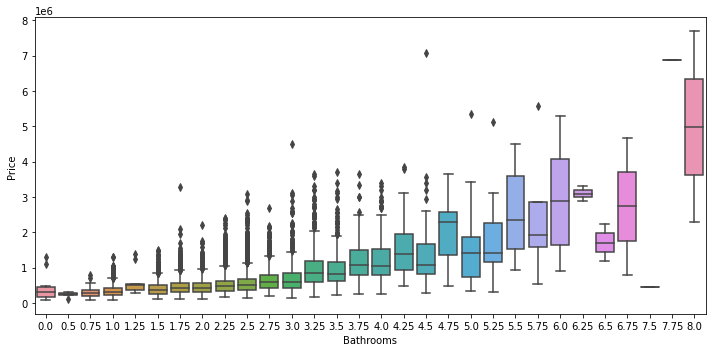

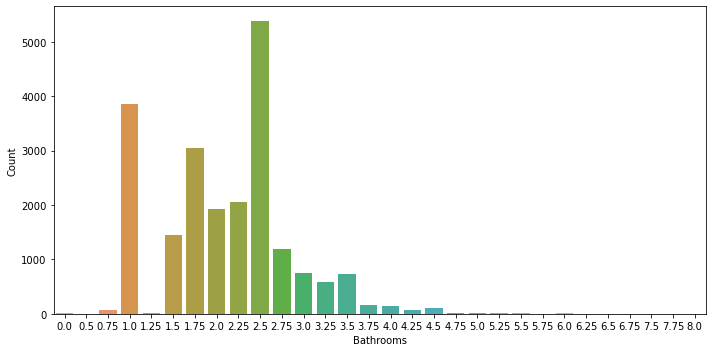

In [10]:
plt.figure(figsize=(10,5))
sns.boxplot(x='bathrooms', y='price', data=data)
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(x='bathrooms', data=data)
plt.xlabel('Bathrooms')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


* Number of bathrooms mostly is around 1 - 2.5, while the price will be higher as the number of bathrooms increasing

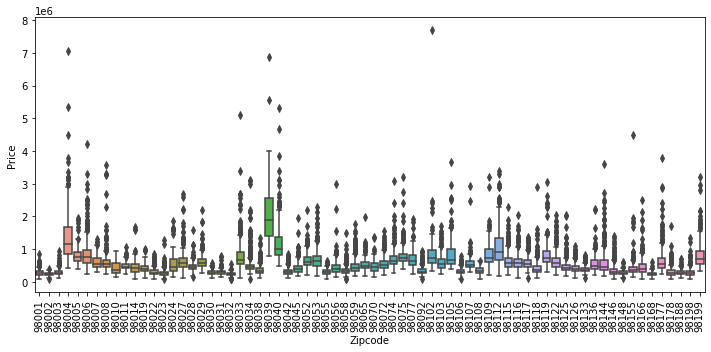

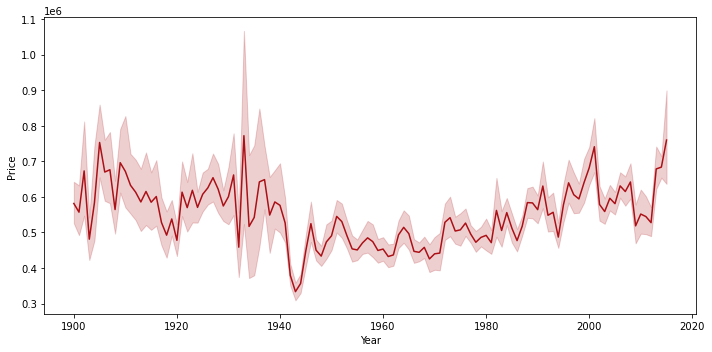

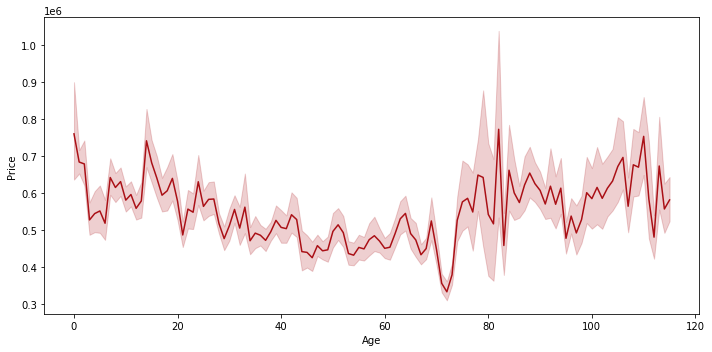

In [11]:
plt.figure(figsize=(10,5))
sns.boxplot(x='zipcode', y='price', data=data)
plt.xlabel('Zipcode')
plt.xticks(rotation = 90)
plt.ylabel('Price')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
sns.lineplot(x='yr_built', y='price', data=data)
plt.xlabel('Year')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
sns.lineplot(x='Age', y='price', data=data)
plt.xlabel('Age')
plt.ylabel('Price')
plt.tight_layout()
plt.show()


* There are houses in some area that is relatively have higher price than other areas.
* Houses that built in around 1940 - 1980 seems to be cheaper.


* # **Visualization for Numerical/Interval Data**

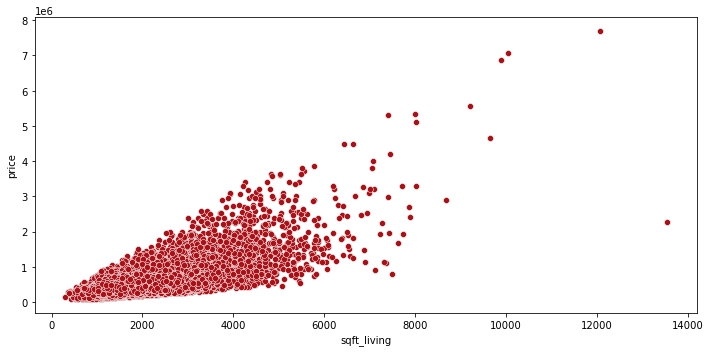

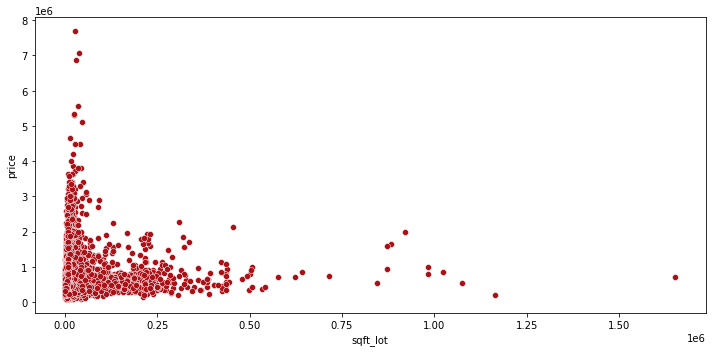

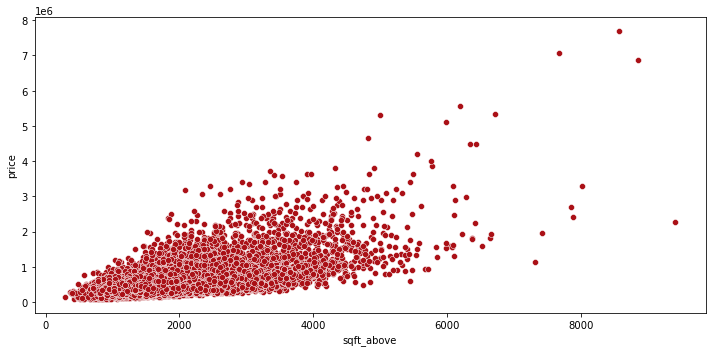

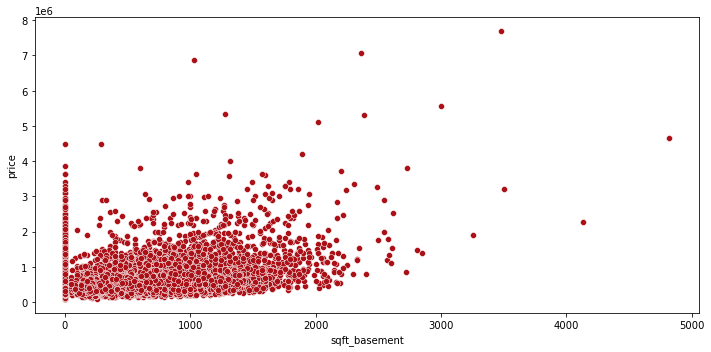

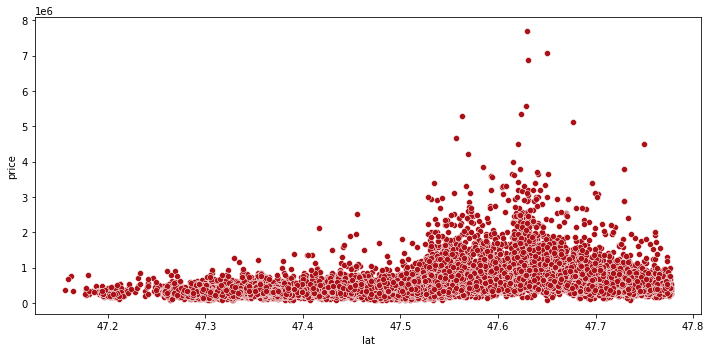

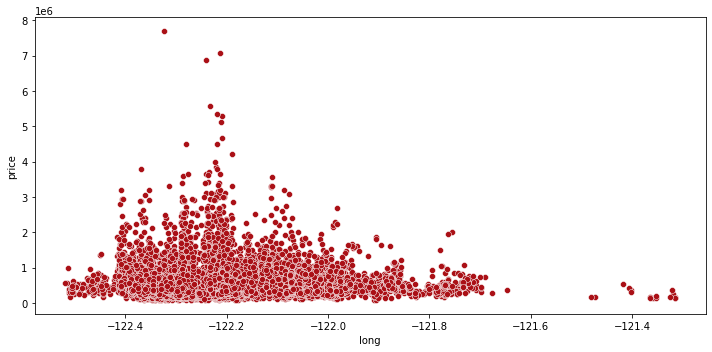

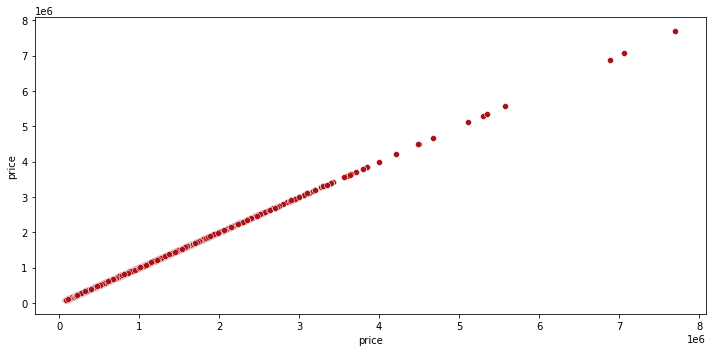

In [12]:
column=['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'lat', 'long', 'price']
for column in column:
    plt.figure(figsize=(10,5))
    sns.scatterplot(x = data[column], y=data['price'])
    plt.tight_layout()
    plt.show()




* sqft_living and sqft_above shows clearer linear lines than others

* # **Correlation Matrix**

Correlation matrix is used to visualize the correlation between numerical variables.

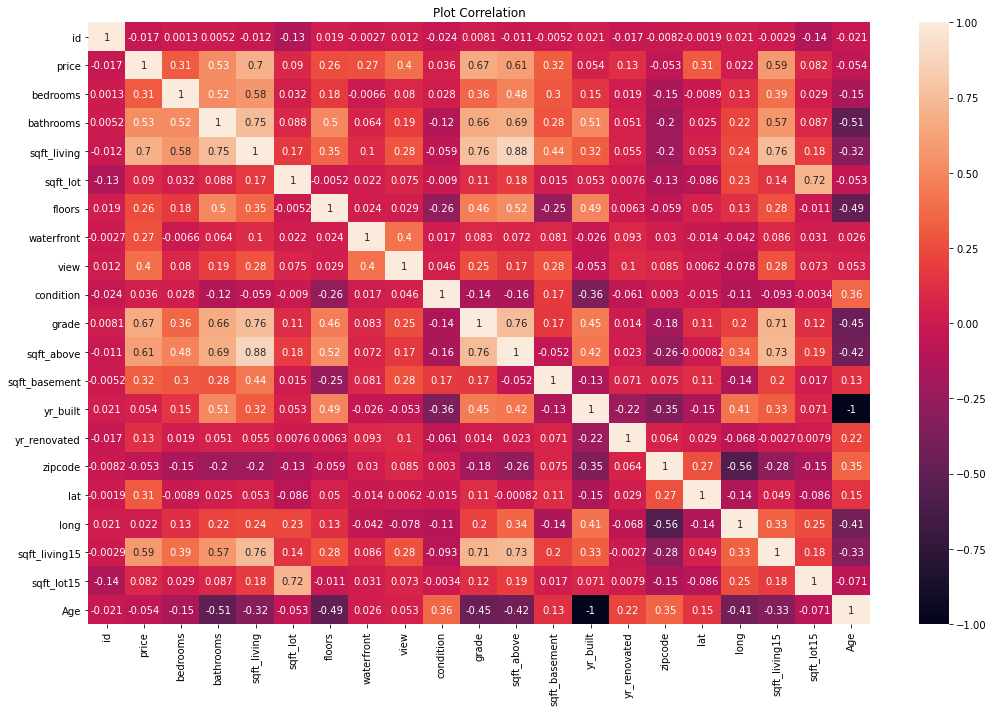

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True)
plt.title('Plot Correlation')
plt.tight_layout()
plt.show()

#  **🟥 MULTIPLE LINEAR REGRESSION MODEL BUILDING 🟥**

In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



In [15]:
X = data.drop(['price', 'yr_built', 'yr_renovated', 'id', 'zipcode', 'date'], axis=1)
Y = data['price']


In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
reg = LinearRegression()
reg.fit(X_train, Y_train)
y_pred = reg.predict(X_test)



In [17]:
print('Coefficient:', reg.coef_)
print('Intercept:', reg.intercept_)
print('R^2: %.2f ' % r2_score(Y_test, y_pred))
print('Mean Absolute error:', mean_absolute_error(Y_test, y_pred))
print('Mean Squared error:', mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, y_pred)))

Coefficient: [-3.68676684e+04  4.49837735e+04  1.11733812e+02  1.17951101e-01
  1.60286674e+03  5.26104381e+05  5.07525838e+04  2.92647375e+04
  9.90877855e+04  7.06178852e+01  4.11159262e+01  5.60234795e+05
 -1.03522915e+05  2.03104021e+01 -3.66036238e-01  2.56673261e+03]
Intercept: -40124859.07633312
R^2: 0.70 
Mean Absolute error: 128811.33406826439
Mean Squared error: 43562318143.14186
Root Mean Squared Error: 208715.87899137396


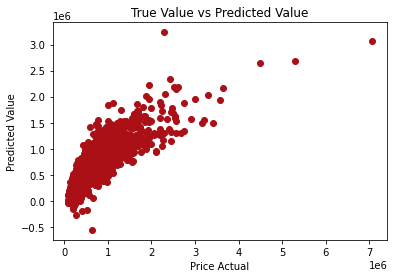

In [18]:
#Plotting Y_test and y_pred
plt.scatter(Y_test, y_pred)
plt.xlabel('Price Actual')
plt.ylabel('Predicted Value')
plt.title('True Value vs Predicted Value')
plt.show()

Regression Model with features that have correlation 0.5 and higher.

In [19]:
feature = ['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15']
X1 = data[feature]
Y1 = data[['price']]

In [20]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2)
reg.fit(X1_train, Y1_train)
y1_pred = reg.predict(X1_test)

In [21]:
print('Coefficient:', reg.coef_)
print('Intercept:', reg.intercept_)
print('R^2: %.2f ' % r2_score(Y1_test, y1_pred))
print('Mean Absolute error:', mean_absolute_error(Y1_test, y1_pred))
print('Mean Squared error:', mean_squared_error(Y1_test, y1_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y1_test, y1_pred)))

Coefficient: [[-3.62207855e+04  2.42282155e+02  1.11429085e+05 -7.55716173e+01
   2.04206681e+01]]
Intercept: [-646408.84370043]
R^2: 0.54 
Mean Absolute error: 160598.88375758467
Mean Squared error: 63116347170.442116
Root Mean Squared Error: 251229.6701634624


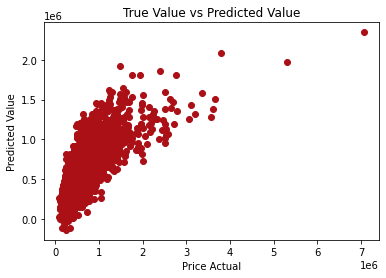

In [22]:
#Plotting Y_test and y_pred
plt.scatter(Y1_test, y1_pred)
plt.xlabel('Price Actual')
plt.ylabel('Predicted Value')
plt.title('True Value vs Predicted Value')
plt.show()

*Any advice will be very valuable